In [2]:
#Script to merge and plot VIX & VXO data

import pandas as pd 
import numpy as np
from statsmodels.api import OLS, add_constant
from datetime import datetime
from dateutil.relativedelta import relativedelta



In [3]:

df_vix_1990_to_present = pd.read_excel('/Users/matthewwest_1/Downloads/ECO1400/PS3/ECO1200/ECO2411/VIX_History_1990_present.xlsx', sheet_name='VIX', parse_dates=['DATE'], index_col='DATE')
df_vix_1990_to_present = df_vix_1990_to_present.add_suffix('_VIX')
df_vix_1990_to_present.head()

,OPEN_VIX,HIGH_VIX,LOW_VIX,CLOSE_VIX
DATE,,,,
1990-01-02,17.24,17.24,17.24,17.24
1990-01-03,18.19,18.19,18.19,18.19
1990-01-04,19.22,19.22,19.22,19.22
1990-01-05,20.11,20.11,20.11,20.11
1990-01-08,20.26,20.26,20.26,20.26


In [4]:
#Reading in VXO data
df_vxo_1986_2003 = pd.read_excel('/Users/matthewwest_1/Downloads/ECO1400/PS3/ECO1200/ECO2411/VIX_History_1990_present.xlsx', sheet_name='VXO_1986_2003', parse_dates=['Date'], index_col='Date')
df_vxo_1986_2003.head()

,Open,High,Low,Close
Date,,,,
1986-01-02,17.93,18.71,17.40,18.07
1986-01-03,19.04,19.10,17.72,17.96
1986-01-06,17.99,18.17,17.05,17.05
1986-01-07,18.01,18.11,17.30,17.39
1986-01-08,18.04,21.15,16.63,19.97


In [5]:
df_vxo_2004_2021 = pd.read_excel('/Users/matthewwest_1/Downloads/ECO1400/PS3/ECO1200/ECO2411/VIX_History_1990_present.xlsx', sheet_name='VXO_2004_2021', parse_dates=['Date'], index_col='Date')
df_vxo_2004_2021.head()

,Open,High,Low,Close
Date,,,,
2004-01-02,18.13,18.59,17.60,17.94
2004-01-05,17.82,17.85,16.69,16.71
2004-01-06,16.63,16.78,15.07,15.34
2004-01-07,15.75,16.14,14.75,14.85
2004-01-08,14.86,15.39,14.42,14.46


In [6]:
#Need to concat the VXO dfs into a single df
df_vxo = pd.concat([df_vxo_1986_2003[['Close','Open']], df_vxo_2004_2021[['Close','Open']]])
print(df_vxo.index.min(), df_vxo.index.max()) #Checking date range
df_vxo = df_vxo.add_suffix('_VXO')
df_vxo.tail()


1986-01-02 00:00:00 2021-01-07 00:00:00


,Close_VXO,Open_VXO
Date,,
2020-12-31,21.05,21.74
2021-01-04,24.9,22.43
2021-01-05,23.69,25.24
2021-01-06,23.28,23.48
2021-01-07,20.87,20.57


In [7]:
#Merge VXO and VIX

merged_df = pd.merge(df_vix_1990_to_present, df_vxo, left_index=True, right_index=True, how='outer')
for x in merged_df.columns:
    merged_df[x] = pd.to_numeric(merged_df[x], errors='coerce')

merged_df['VIX_minus_VXO_Close'] = merged_df['CLOSE_VIX'] - merged_df['Close_VXO']

merged_df.tail()

,OPEN_VIX,HIGH_VIX,LOW_VIX,CLOSE_VIX,Close_VXO,Open_VXO,VIX_minus_VXO_Close
DATE,,,,,,,
2025-10-09,16.31,17.27,16.26,16.43,NaN,NaN,NaN
2025-10-10,16.36,22.44,16.23,21.66,NaN,NaN,NaN
2025-10-13,19.45,20.77,18.61,19.03,NaN,NaN,NaN
2025-10-14,21.46,22.94,19.18,20.81,NaN,NaN,NaN
2025-10-15,20.02,22.44,19.11,20.64,NaN,NaN,NaN


In [9]:
merged_df.to_excel('/Users/matthewwest_1/Downloads/ECO1400/PS3/ECO1200/ECO2411/merged_VIX_VXO_data.xlsx')

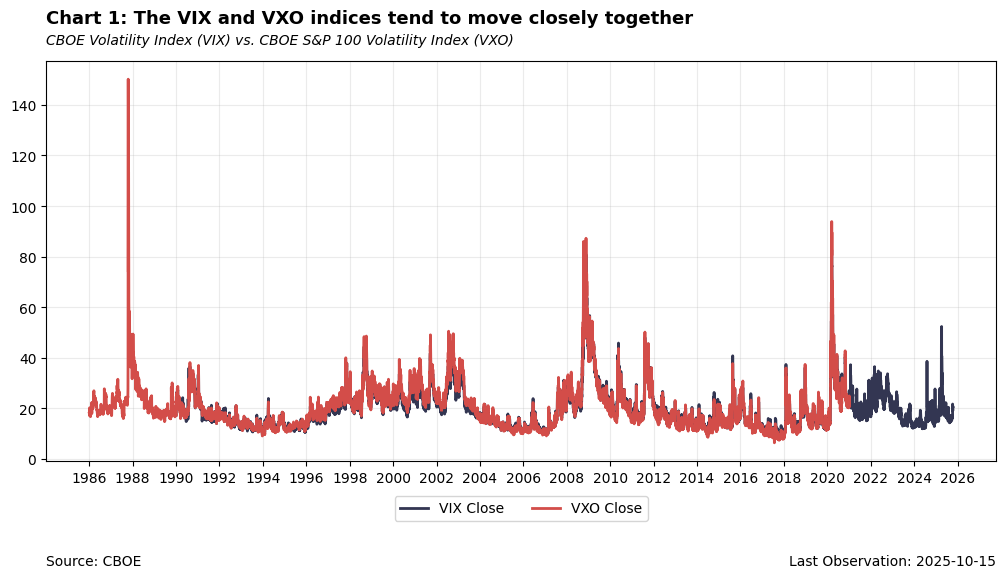

In [8]:
#Plotting vix and VXO 

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

chart1_df = merged_df.copy()

# Convert string index to PeriodIndex, then to DatetimeIndex
chart1_df.index = pd.PeriodIndex(chart1_df.index, freq='D').to_timestamp(how='start')

plt.figure(figsize=(10, 5))

colors = ['#D34D49', '#69BADE', '#8CB861', 'maroon', '#AB3192','#FF6600','#008080']

plt.plot(
    chart1_df.index,
    chart1_df['CLOSE_VIX'],
    label='VIX Close',
    linewidth=2,
    color='#333652'
)

plt.plot(
    chart1_df.index,
    chart1_df['Close_VXO'],
    label='VXO Close',
    linewidth=2,
    color='#D34D49'
)


# Add horizontal line at y=0
# plt.axhline(0, color='black')

# Add annotations
plt.annotate('CBOE Volatility Index (VIX) vs. CBOE S&P 100 Volatility Index (VXO)',
             xy=(0, 1.07),
             xycoords='axes fraction',
             ha='left',
             va="top",
             fontsize=10,
             style='italic')

plt.annotate('Source: CBOE',
             xy=(0, -0.25),
             xycoords='axes fraction',
             ha='left',
             va="center",
             fontsize=10)


plt.annotate(
    f"Last Observation: {pd.Period(chart1_df.index[-1], freq='D').strftime('%Y-%m-%d')}",
    xy=(1, -0.25),
    xycoords="axes fraction",
    ha="right",
    va="center",
    fontsize=10,
)

plt.annotate('Chart 1: The VIX and VXO indices tend to move closely together',
             xy=(0, 1.13),
             xycoords='axes fraction',
             ha='left',
             va="top",
             fontsize=13,
             weight='bold')

# Add grid
plt.grid(alpha=0.25)

# Set y-axis limits
# plt.ylim(-2.5, 2)

# Calculate extended x-axis limits
start_limit = chart1_df.index[0] - pd.Timedelta(days=1000)  # Add space before the first point
end_limit = chart1_df.index[-1] + pd.Timedelta(days=1000)  # Add space after the last point

# Set x-axis tick frequency and extended limits
ax = plt.gca()
# ax.set_xlim(start_limit, end_limit)
ax.xaxis.set_major_locator(mdates.YearLocator(base=2, month=1, day=1))  # Every 2 years, January (Q1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Year only
# plt.subplots_adjust(left=0.1, right=1.2, top=0.85, bottom=0.15)

fig = plt.gcf()       # Get current figure
fig.patch.set_facecolor('none')
ax = plt.gca()        # Get current axes
ax.patch.set_facecolor('none')

# Single legend call (position it however you like)
leg = ax.legend(
    ncol=4,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.07),
    frameon=True           # ensure the frame (border) is drawn
)

plt.subplots_adjust(left=0.1, right=1.05, top=0.9, bottom=0.1)


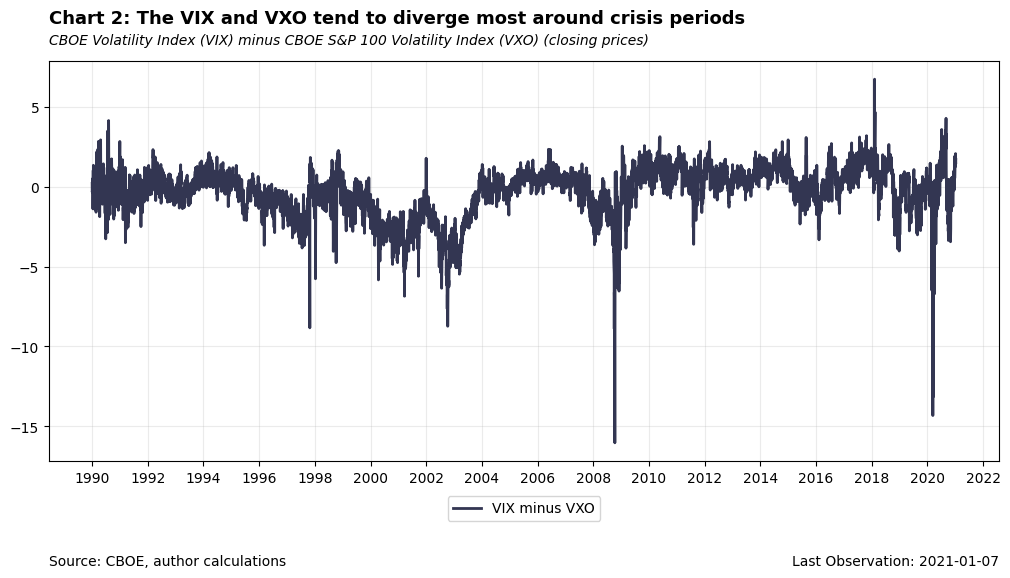

In [10]:
#Might be helpful to compare the diff between the two in a plot

chart1_df = merged_df.copy()

# Convert string index to PeriodIndex, then to DatetimeIndex
chart1_df.index = pd.PeriodIndex(chart1_df.index, freq='D').to_timestamp(how='start')

chart1_df.dropna(inplace=True, subset=['VIX_minus_VXO_Close'])

plt.figure(figsize=(10, 5))

colors = ['#D34D49', '#69BADE', '#8CB861', 'maroon', '#AB3192','#FF6600','#008080']

plt.plot(
    chart1_df.index,
    chart1_df['VIX_minus_VXO_Close'],
    label='VIX minus VXO',
    linewidth=2,
    color='#333652'
)


# Add horizontal line at y=0
# plt.axhline(0, color='black')

# Add annotations
plt.annotate('CBOE Volatility Index (VIX) minus CBOE S&P 100 Volatility Index (VXO) (closing prices)',
             xy=(0, 1.07),
             xycoords='axes fraction',
             ha='left',
             va="top",
             fontsize=10,
             style='italic')

plt.annotate('Source: CBOE, author calculations',
             xy=(0, -0.25),
             xycoords='axes fraction',
             ha='left',
             va="center",
             fontsize=10)


plt.annotate(
    f"Last Observation: {pd.Period(chart1_df.index[-1], freq='D').strftime('%Y-%m-%d')}",
    xy=(1, -0.25),
    xycoords="axes fraction",
    ha="right",
    va="center",
    fontsize=10,
)

plt.annotate('Chart 2: The VIX and VXO tend to diverge most around crisis periods',
             xy=(0, 1.13),
             xycoords='axes fraction',
             ha='left',
             va="top",
             fontsize=13,
             weight='bold')

# Add grid
plt.grid(alpha=0.25)

# Set y-axis limits
# plt.ylim(-2.5, 2)

# Calculate extended x-axis limits
start_limit = chart1_df.index[0] - pd.Timedelta(days=1000)  # Add space before the first point
end_limit = chart1_df.index[-1] + pd.Timedelta(days=1000)  # Add space after the last point

# Set x-axis tick frequency and extended limits
ax = plt.gca()
# ax.set_xlim(start_limit, end_limit)
ax.xaxis.set_major_locator(mdates.YearLocator(base=2, month=1, day=1))  # Every 2 years, January (Q1)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Year only
# plt.subplots_adjust(left=0.1, right=1.2, top=0.85, bottom=0.15)

fig = plt.gcf()       # Get current figure
fig.patch.set_facecolor('none')
ax = plt.gca()        # Get current axes
ax.patch.set_facecolor('none')

# Single legend call (position it however you like)
leg = ax.legend(
    ncol=4,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.07),
    frameon=True           # ensure the frame (border) is drawn
)

plt.subplots_adjust(left=0.1, right=1.05, top=0.9, bottom=0.1)


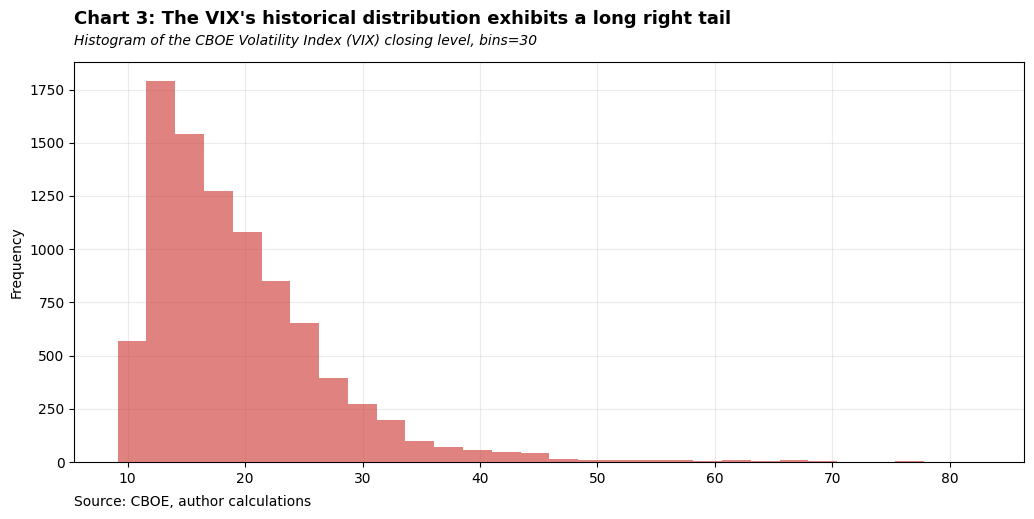

In [11]:
#Plotting the historical distribution of the VIX 

merged_df['CLOSE_VIX'].plot(kind='hist', bins=30, alpha=0.7, color='#D34D49',zorder=3, figsize=(10,5),label=None)

# Add grid
plt.grid(alpha=0.25)

# Add annotations
plt.annotate('Histogram of the CBOE Volatility Index (VIX) closing level, bins=30',
             xy=(0, 1.07),
             xycoords='axes fraction',
             ha='left',
             va="top",
             fontsize=10,
             style='italic')

plt.annotate('Source: CBOE, author calculations',
             xy=(0, -0.10),
             xycoords='axes fraction',
             ha='left',
             va="center",
             fontsize=10)


# plt.annotate(
#     f"Last Observation: {pd.Period(chart1_df.index[-1], freq='D').strftime('%Y-%m-%d')}",
#     xy=(1, -0.25),
#     xycoords="axes fraction",
#     ha="right",
#     va="center",
#     fontsize=10,
# )

plt.annotate("Chart 3: The VIX's historical distribution exhibits a long right tail",
             xy=(0, 1.13),
             xycoords='axes fraction',
             ha='left',
             va="top",
             fontsize=13,
             weight='bold')



fig = plt.gcf()       # Get current figure
fig.patch.set_facecolor('none')
ax = plt.gca()        # Get current axes
ax.patch.set_facecolor('none')

# # Single legend call (position it however you like)
# leg = ax.legend(
#     ncol=4,
#     loc='upper center',
#     bbox_to_anchor=(0.5, -0.07),
#     frameon=True           # ensure the frame (border) is drawn
# )

plt.subplots_adjust(left=0.1, right=1.05, top=0.9, bottom=0.1)


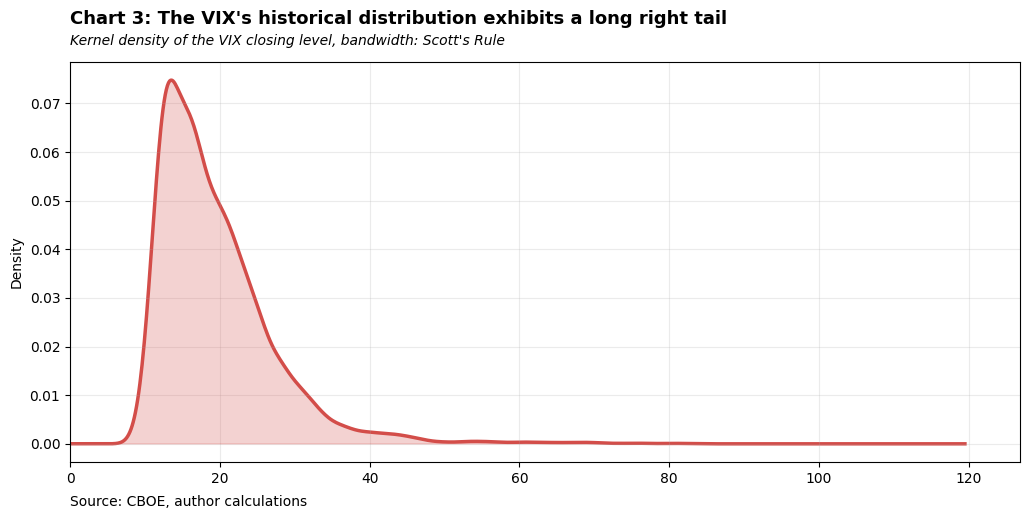

In [12]:
RED = "#D34D49"
s = merged_df["CLOSE_VIX"].dropna()

fig, ax = plt.subplots(figsize=(10, 5))

# KDE line in your red
s.plot(kind="kde", lw=2.5, color=RED, ax=ax, zorder=1, label=None)

# Grab the line data and fill underneath
line = ax.lines[0]
x, y = line.get_xdata(), line.get_ydata()
ax.set_xlim(left=0)  # VIX can't be negative
ax.fill_between(x, y, 0, color=RED, alpha=0.25, zorder=2)

# (Optional) faint histogram backdrop on same density scale
# ax.hist(s, bins=30, density=True, alpha=0.12, color=RED, zorder=1)

plt.grid(alpha=0.25)
plt.annotate("Kernel density of the VIX closing level, bandwidth: Scott's Rule",
             xy=(0, 1.07), xycoords="axes fraction", ha="left", va="top", fontsize=10, style="italic")
plt.annotate("Source: CBOE, author calculations",
             xy=(0, -0.10), xycoords="axes fraction", ha="left", va="center", fontsize=10)
plt.annotate("Chart 3: The VIX's historical distribution exhibits a long right tail",
             xy=(0, 1.13), xycoords="axes fraction", ha="left", va="top", fontsize=13, weight="bold")

fig.patch.set_facecolor("none"); ax.patch.set_facecolor("none")
plt.subplots_adjust(left=0.1, right=1.05, top=0.9, bottom=0.1)

In [13]:
##QQ plot against normal distribution
s = merged_df["CLOSE_VIX"].astype(float).dropna().values
mu, sigma = s.mean(), s.std(ddof=1)

osm, osr = stats.probplot(s, dist="norm", fit=False)  # osm=std normal order stats, osr=raw sorted sample
theoretical = mu + sigma * osm

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(theoretical, osr, s=14, color="#D34D49")
mn = min(theoretical.min(), osr.min()); mx = max(theoretical.max(), osr.max())
ax.plot([mn, mx], [mn, mx], color="#333652", lw=2, alpha=0.7,zorder=2)

plt.grid(alpha=0.25)
plt.annotate("QQ plot of the VIX closing level against a Gaussian distribution",
             xy=(0, 1.07), xycoords="axes fraction", ha="left", va="top", fontsize=10, style="italic")
plt.annotate("Source: CBOE, author calculations",
             xy=(0, -0.20), xycoords="axes fraction", ha="left", va="center", fontsize=10)
plt.annotate("Chart 4: The VIX's distribution deviates significantly from normality, particularly in the tails",
             xy=(0, 1.13), xycoords="axes fraction", ha="left", va="top", fontsize=13, weight="bold")

fig.patch.set_facecolor("none"); ax.patch.set_facecolor("none")
plt.subplots_adjust(left=0.1, right=1.05, top=0.9, bottom=0.1)
ax.set_ylabel("Sample Quantiles")
ax.set_xlabel("Theoretical Quantiles")
# plt.ylim(0,10)

plt.show()


NameError: name 'stats' is not defined

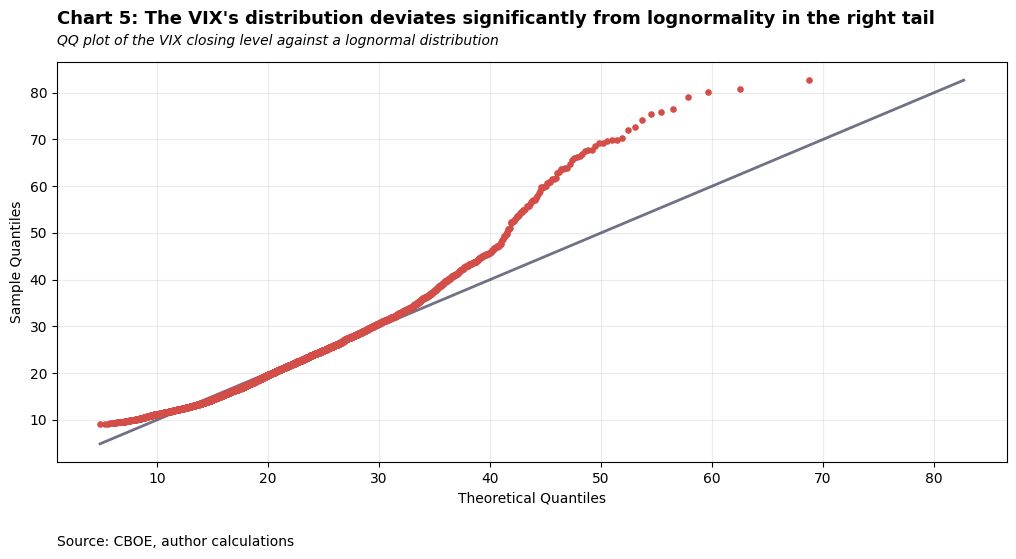

In [104]:
#QQ plot agaisnt log normal dist 


# --- data ---
s = merged_df["CLOSE_VIX"].astype(float).dropna().values
s = s[s > 0]  # lognormal needs strictly positive data

# --- fit a lognormal: shape = sigma_log, scale = exp(mu_log), loc fixed at 0 ---
shape, loc, scale = stats.lognorm.fit(s, floc=0)  # loc=0 prevents negative support

# --- sample & theoretical quantiles on same probability grid ---
n = s.size
osr = np.sort(s)                                   # sample quantiles (y-axis)
q = (np.arange(1, n+1) - 0.5) / n                  # plotting positions
theoretical = stats.lognorm.ppf(q, s=shape, loc=loc, scale=scale)  # x-axis

# --- plot ---
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(theoretical, osr, s=14, color="#D34D49", zorder=3)

mn = min(theoretical.min(), osr.min())
mx = max(theoretical.max(), osr.max())
ax.plot([mn, mx], [mn, mx], color="#333652", lw=2, alpha=0.7, zorder=2)

plt.grid(alpha=0.25)
plt.annotate("QQ plot of the VIX closing level against a lognormal distribution",
             xy=(0, 1.07), xycoords="axes fraction", ha="left", va="top",
             fontsize=10, style="italic")
plt.annotate("Source: CBOE, author calculations",
             xy=(0, -0.20), xycoords="axes fraction", ha="left", va="center",
             fontsize=10)
plt.annotate("Chart 5: The VIX's distribution deviates significantly from lognormality in the right tail",
             xy=(0, 1.13), xycoords="axes fraction", ha="left", va="top",
             fontsize=13, weight="bold")

fig.patch.set_facecolor("none"); ax.patch.set_facecolor("none")
plt.subplots_adjust(left=0.1, right=1.05, top=0.9, bottom=0.1)
ax.set_ylabel("Sample Quantiles")
ax.set_xlabel("Theoretical Quantiles")
# ax.set_ylim(0, 100)  # optional, to keep a common scale

plt.show()


In [107]:
#Four moments of the VIX distribution
vix_close = merged_df['CLOSE_VIX'].dropna()
vix_moments = {
    "mean": vix_close.mean(),
    "std": vix_close.std(ddof=1),
    "skew": vix_close.skew(),
    "kurt": vix_close.kurt()
}   

vix_moments_df = pd.DataFrame(vix_moments, index=['CLOSE_VIX'])
vix_moments_df

,mean,std,skew,kurt
CLOSE_VIX,19.459146,7.798574,2.195718,8.595382


In [108]:
merged_df.head()

,OPEN_VIX,HIGH_VIX,LOW_VIX,CLOSE_VIX,Close_VXO,Open_VXO,VIX_minus_VXO_Close
DATE,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-02,NaN,NaN,NaN,NaN,18.07,17.93,NaN
1986-01-03,NaN,NaN,NaN,NaN,17.96,19.04,NaN
1986-01-06,NaN,NaN,NaN,NaN,17.05,17.99,NaN


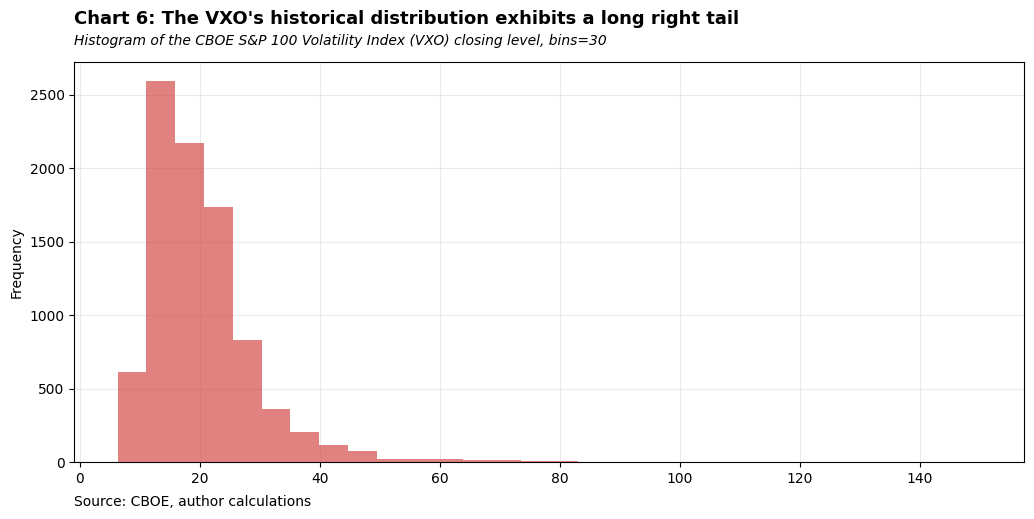

In [110]:
#Distribution of VXO 

merged_df['Close_VXO'].plot(kind='hist', bins=30, alpha=0.7, color='#D34D49',zorder=3, figsize=(10,5),label=None)

# Add grid
plt.grid(alpha=0.25)

# Add annotations
plt.annotate('Histogram of the CBOE S&P 100 Volatility Index (VXO) closing level, bins=30',
             xy=(0, 1.07),
             xycoords='axes fraction',
             ha='left',
             va="top",
             fontsize=10,
             style='italic')

plt.annotate('Source: CBOE, author calculations',
             xy=(0, -0.10),
             xycoords='axes fraction',
             ha='left',
             va="center",
             fontsize=10)


# plt.annotate(
#     f"Last Observation: {pd.Period(chart1_df.index[-1], freq='D').strftime('%Y-%m-%d')}",
#     xy=(1, -0.25),
#     xycoords="axes fraction",
#     ha="right",
#     va="center",
#     fontsize=10,
# )

plt.annotate("Chart 6: The VXO's historical distribution exhibits a long right tail",
             xy=(0, 1.13),
             xycoords='axes fraction',
             ha='left',
             va="top",
             fontsize=13,
             weight='bold')



fig = plt.gcf()       # Get current figure
fig.patch.set_facecolor('none')
ax = plt.gca()        # Get current axes
ax.patch.set_facecolor('none')

# # Single legend call (position it however you like)
# leg = ax.legend(
#     ncol=4,
#     loc='upper center',
#     bbox_to_anchor=(0.5, -0.07),
#     frameon=True           # ensure the frame (border) is drawn
# )

plt.subplots_adjust(left=0.1, right=1.05, top=0.9, bottom=0.1)


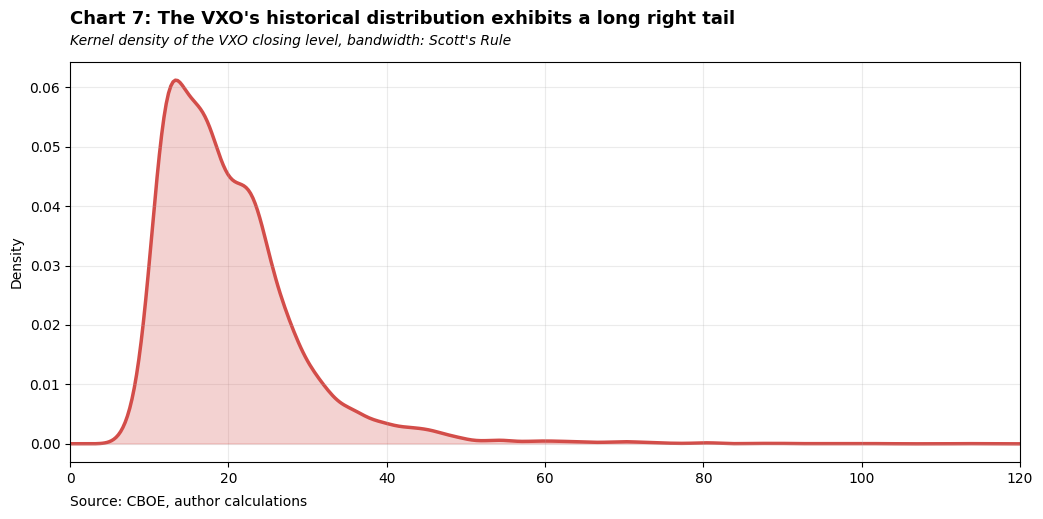

In [114]:
RED = "#D34D49"
s = merged_df["Close_VXO"].dropna()

fig, ax = plt.subplots(figsize=(10, 5))

# KDE line in your red
s.plot(kind="kde", lw=2.5, color=RED, ax=ax, zorder=1, label=None)

# Grab the line data and fill underneath
line = ax.lines[0]
x, y = line.get_xdata(), line.get_ydata()
ax.set_xlim(left=0,right=120)  # VIX can't be negative
ax.fill_between(x, y, 0, color=RED, alpha=0.25, zorder=2)

# (Optional) faint histogram backdrop on same density scale
# ax.hist(s, bins=30, density=True, alpha=0.12, color=RED, zorder=1)

plt.grid(alpha=0.25)
plt.annotate("Kernel density of the VXO closing level, bandwidth: Scott's Rule",
             xy=(0, 1.07), xycoords="axes fraction", ha="left", va="top", fontsize=10, style="italic")
plt.annotate("Source: CBOE, author calculations",
             xy=(0, -0.10), xycoords="axes fraction", ha="left", va="center", fontsize=10)
plt.annotate("Chart 7: The VXO's historical distribution exhibits a long right tail",
             xy=(0, 1.13), xycoords="axes fraction", ha="left", va="top", fontsize=13, weight="bold")

fig.patch.set_facecolor("none"); ax.patch.set_facecolor("none")
plt.subplots_adjust(left=0.1, right=1.05, top=0.9, bottom=0.1)

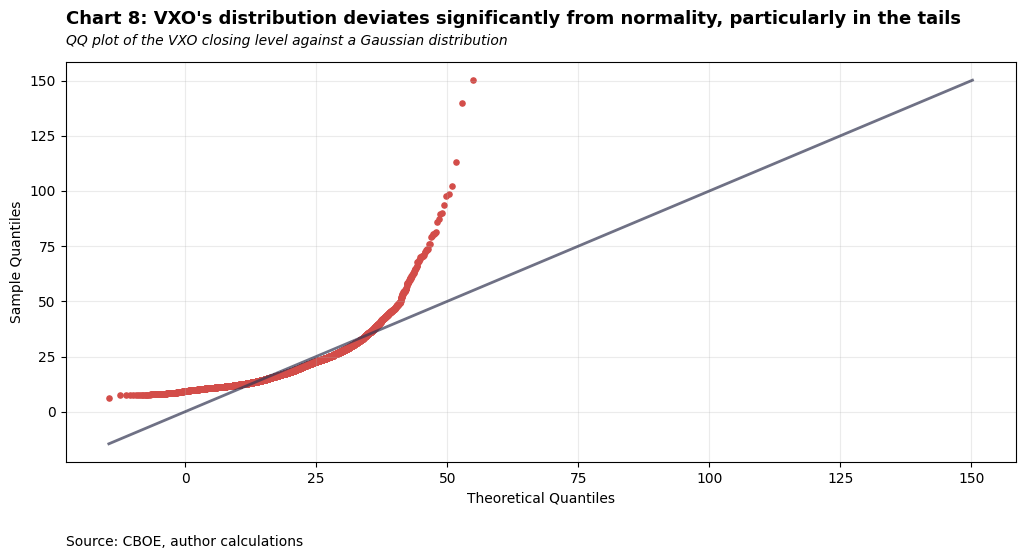

In [116]:
##QQ plot against normal distribution
s = merged_df["Close_VXO"].astype(float).dropna().values
mu, sigma = s.mean(), s.std(ddof=1)

osm, osr = stats.probplot(s, dist="norm", fit=False)  # osm=std normal order stats, osr=raw sorted sample
theoretical = mu + sigma * osm

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(theoretical, osr, s=14, color="#D34D49")
mn = min(theoretical.min(), osr.min()); mx = max(theoretical.max(), osr.max())
ax.plot([mn, mx], [mn, mx], color="#333652", lw=2, alpha=0.7,zorder=2)

plt.grid(alpha=0.25)
plt.annotate("QQ plot of the VXO closing level against a Gaussian distribution",
             xy=(0, 1.07), xycoords="axes fraction", ha="left", va="top", fontsize=10, style="italic")
plt.annotate("Source: CBOE, author calculations",
             xy=(0, -0.20), xycoords="axes fraction", ha="left", va="center", fontsize=10)
plt.annotate("Chart 8: VXO's distribution deviates significantly from normality, particularly in the tails",
             xy=(0, 1.13), xycoords="axes fraction", ha="left", va="top", fontsize=13, weight="bold")

fig.patch.set_facecolor("none"); ax.patch.set_facecolor("none")
plt.subplots_adjust(left=0.1, right=1.05, top=0.9, bottom=0.1)
ax.set_ylabel("Sample Quantiles")
ax.set_xlabel("Theoretical Quantiles")
# plt.ylim(0,10)

plt.show()


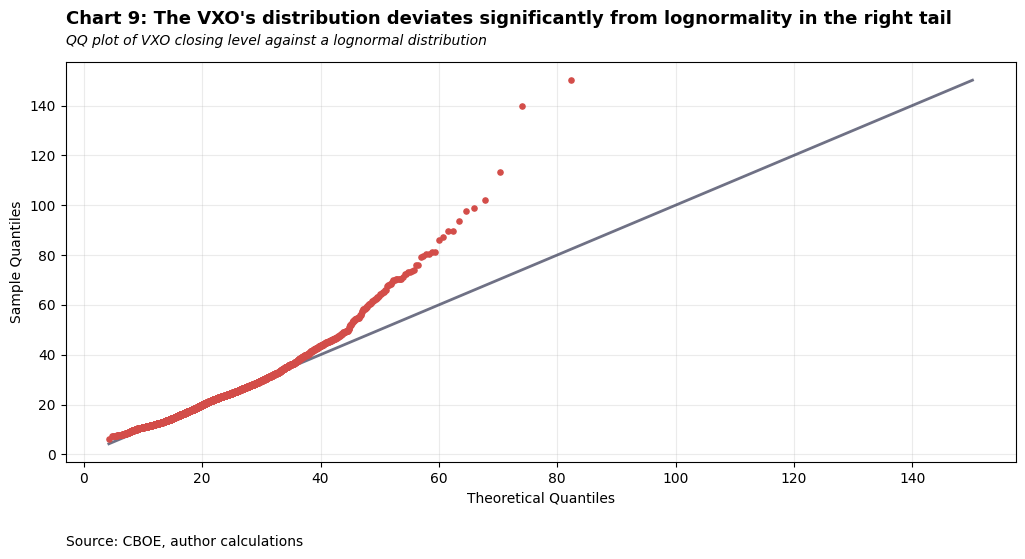

In [117]:
# --- data ---
s = merged_df["Close_VXO"].astype(float).dropna().values
s = s[s > 0]  # lognormal needs strictly positive data

# --- fit a lognormal: shape = sigma_log, scale = exp(mu_log), loc fixed at 0 ---
shape, loc, scale = stats.lognorm.fit(s, floc=0)  # loc=0 prevents negative support

# --- sample & theoretical quantiles on same probability grid ---
n = s.size
osr = np.sort(s)                                   # sample quantiles (y-axis)
q = (np.arange(1, n+1) - 0.5) / n                  # plotting positions
theoretical = stats.lognorm.ppf(q, s=shape, loc=loc, scale=scale)  # x-axis

# --- plot ---
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(theoretical, osr, s=14, color="#D34D49", zorder=3)

mn = min(theoretical.min(), osr.min())
mx = max(theoretical.max(), osr.max())
ax.plot([mn, mx], [mn, mx], color="#333652", lw=2, alpha=0.7, zorder=2)

plt.grid(alpha=0.25)
plt.annotate("QQ plot of VXO closing level against a lognormal distribution",
             xy=(0, 1.07), xycoords="axes fraction", ha="left", va="top",
             fontsize=10, style="italic")
plt.annotate("Source: CBOE, author calculations",
             xy=(0, -0.20), xycoords="axes fraction", ha="left", va="center",
             fontsize=10)
plt.annotate("Chart 9: The VXO's distribution deviates significantly from lognormality in the right tail",
             xy=(0, 1.13), xycoords="axes fraction", ha="left", va="top",
             fontsize=13, weight="bold")

fig.patch.set_facecolor("none"); ax.patch.set_facecolor("none")
plt.subplots_adjust(left=0.1, right=1.05, top=0.9, bottom=0.1)
ax.set_ylabel("Sample Quantiles")
ax.set_xlabel("Theoretical Quantiles")
# ax.set_ylim(0, 100)  # optional, to keep a common scale

plt.show()


In [118]:
merged_df.head()

,OPEN_VIX,HIGH_VIX,LOW_VIX,CLOSE_VIX,Close_VXO,Open_VXO,VIX_minus_VXO_Close
DATE,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-02,NaN,NaN,NaN,NaN,18.07,17.93,NaN
1986-01-03,NaN,NaN,NaN,NaN,17.96,19.04,NaN
1986-01-06,NaN,NaN,NaN,NaN,17.05,17.99,NaN


In [119]:
#Four moments of the VXO distribution
vxo_close = merged_df['Close_VXO'].dropna()
vxo_moments = {
    "mean": vxo_close.mean(),
    "std": vxo_close.std(ddof=1),
    "skew": vxo_close.skew(),
    "kurt": vxo_close.kurt()
}   

vxo_moments_df = pd.DataFrame(vxo_moments, index=['CLOSE_VXO'])
vxo_moments_df

,mean,std,skew,kurt
CLOSE_VXO,20.199732,9.196544,2.76155,17.288512


In [124]:
#combining stats for VXO and VIX 

moments_df = pd.concat([vix_moments_df, vxo_moments_df])
moments_df =moments_df.round(2)
moments_df

,mean,std,skew,kurt
CLOSE_VIX,19.46,7.8,2.20,8.60
CLOSE_VXO,20.20,9.2,2.76,17.29


In [130]:
#Rolling moments of both indices

rolling_moments_df = pd.DataFrame()

for x in ['CLOSE_VIX','Close_VXO']:
    rolling_mean = merged_df[x].rolling(window=730,min_periods=650).mean()
    rolling_std = merged_df[x].rolling(window=730,min_periods=650).std()
    rolling_skew = merged_df[x].rolling(window=730,min_periods=650).skew()
    rolling_kurt = merged_df[x].rolling(window=730,min_periods=650).kurt()

    rolling_moments_df = pd.concat([rolling_moments_df, pd.DataFrame({
        f'mean_{x}': rolling_mean,
        f'std_{x}': rolling_std,
        f'skew_{x}': rolling_skew,
        f'kurt_{x}': rolling_kurt
    }, index=merged_df.index)], axis=1)

rolling_moments_df.tail()


,mean_CLOSE_VIX,std_CLOSE_VIX,skew_CLOSE_VIX,kurt_CLOSE_VIX,mean_Close_VXO,std_Close_VXO,skew_Close_VXO,kurt_Close_VXO
DATE,,,,,,,,
2025-10-09,17.138658,4.354959,2.665453,13.365750,NaN,NaN,NaN,NaN
2025-10-10,17.134082,4.348438,2.674046,13.462365,NaN,NaN,NaN,NaN
2025-10-13,17.129260,4.344374,2.682346,13.532776,NaN,NaN,NaN,NaN
2025-10-14,17.128808,4.343973,2.683156,13.539713,NaN,NaN,NaN,NaN
2025-10-15,17.125808,4.340785,2.688762,13.592335,NaN,NaN,NaN,NaN


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ---- Prep once ----
chart_df = rolling_moments_df.copy()
# ensure DatetimeIndex (daily)
chart_df.index = pd.PeriodIndex(chart_df.index, freq='D').to_timestamp('s')

moments = ['mean', 'var', 'skew', 'kurt']
titles  = ['Mean', 'Variance', 'Skewness', 'Kurtosis']

# ---- Figure & axes (2x2) ----
fig, axes = plt.subplots(2, 2, figsize=(14, 9), sharex=False)
axes = axes.ravel()

# ---- Plot panels ----
for ax, moment, ttl in zip(axes, moments, titles):
    ax.plot(chart_df.index, chart_df[f"{moment}_CLOSE_VIX"],
            label='VIX (2-yr rolling)', linewidth=2, color='#333652', zorder=3)
    ax.plot(chart_df.index, chart_df[f"{moment}_Close_VXO"],
            label='VXO (2-yr rolling)', linewidth=2, color='#D34D49', zorder=3)

    # helpful zero line for skew/kurt
    if moment in ('skew', 'kurt'):
        ax.axhline(0, color='black', lw=0.8, alpha=0.35, zorder=1)

    ax.set_title(ttl, loc='left', fontsize=11, pad=6)
    ax.grid(alpha=0.25)
    ax.patch.set_facecolor('none')

# ---- X-axis: ticks every 2 years (Jan 1), format as YYYY ----
for ax in axes:
    ax.xaxis.set_major_locator(mdates.YearLocator(base=4, month=1, day=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Keep full data range visible
xmin, xmax = chart_df.index.min(), chart_df.index.max()
axes[-1].set_xlim(xmin, xmax)

# ---- Single legend for the whole figure ----
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc='lower center', bbox_to_anchor=(0.5, 0.04),
           frameon=True)

# ---- Overall figure annotations (not per-axis) ----
last_obs = pd.Period(chart_df.index.max(), freq='D').strftime('%Y-%m-%d')

fig.text(0.29, 0.97, "Chart 10:Two-Year Rolling Moments of VIX and VXO (Daily)",
         ha='center', va='top', fontsize=14, fontweight='bold')


# subtitle / description
fig.text(0.06, 0.93,
         "Each panel shows the specified moment computed over a 730-day rolling window.",
         fontsize=10, style='italic')

fig.text(0.06, 0.02, "Source: CBOE, author calculations", fontsize=10, va='center')
fig.text(0.94, 0.02, f"Last Observation: {last_obs}", fontsize=10, ha='right', va='center')

# ---- Styling & layout ----
fig.patch.set_facecolor('none')
plt.tight_layout(rect=[0.06, 0.08, 0.98, 0.93])  # leave space for legend/supertitle/text
plt.show()


NameError: name 'rolling_moments_df' is not defined